In [151]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
df = pd.read_csv('EDA1.csv')
df.drop(columns = ['Day'], axis = 1, inplace = True)
well_3 = df[df['Well Name'] == 3]
well_3.drop(columns = ['Well Name'], axis = 1, inplace = True)
well_3.reset_index(inplace = True, drop = True)
well_3 = pd.Series(data = well_3['Oil Volume'])
well_3 = well_3[well_3 > 0]
well_3.reset_index(inplace = True, drop = True)

C:\Users\csmid\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0,0.5,'Production (BBL)')

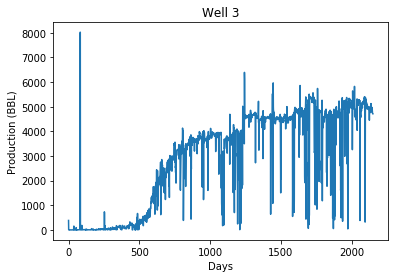

In [180]:
plt.plot(well_3)
plt.title('Well 3')
plt.xlabel('Days')
plt.ylabel('Production (BBL)')

In [154]:
well_3 = well_3[:2150]
well_3.reset_index(inplace = True, drop = True)

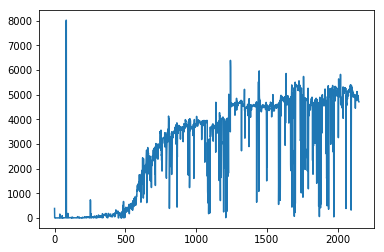

In [155]:
plt.plot(well_3)

In [156]:
from numpy import percentile
multiplier = 1.5
def outlier_finder(data, timesteps, multiplier):
    outliers_index = []
    outliers_value = []
    for i in range(0, len(data), timesteps):
        q25 = percentile(data[i:i+timesteps], 25)
        q75 = percentile(data[i:i+timesteps], 75)
        iqr = q75 - q25
        cut_off = iqr * multiplier
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in data[i:i+timesteps] if x < lower or x > upper]
        outliers_value.extend(outliers)
        for idx, val in enumerate(data[i:i+timesteps]):
            if val in outliers:
                outliers_index.append(idx + i)
    index = outliers_index
    value = outliers_value
    return index, value

In [157]:
#Plots the number of outliers the outlier finder function detects at different timesteps 
#num_of_outliers = []
#for i in range(1,10):
 #   x, y = outlier_finder(well_3, i, multiplier)
  #  length = len(x)
  #  num_of_outliers.append(length)
#plt.plot(num_of_outliers) 

Due to the large quantity of data, picking out outliers manually is too time consuming. What I plan on doing is using the visualization of the clean plot to determine which dataset is "clean". I assume the production values below 1000 are datapoints that resemble problems and are not due to natural variation. Therefore, I want my cleaned graph to have these datapoints removed.

Text(0,0.5,'Production (BBL)')

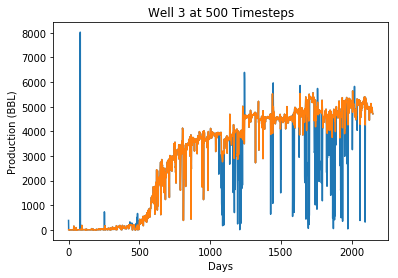

In [186]:
index, values = outlier_finder(well_3,500, multiplier)
well_3_clean = well_3.drop(index = index)
plt.plot(well_3)
plt.plot(well_3_clean)
plt.title('Well 3 at 500 Timesteps')
plt.xlabel('Days')
plt.ylabel('Production (BBL)')

In [159]:
index, values = outlier_finder(well_3, 275, multiplier)
well_3_clean = well_3.drop(index = index)
well_3_clean.reset_index(inplace = True, drop = True)
well_3_clean.to_csv(r'C:\Users\csmid\Volve Project\well_3_clean.csv', index = None, header = True)

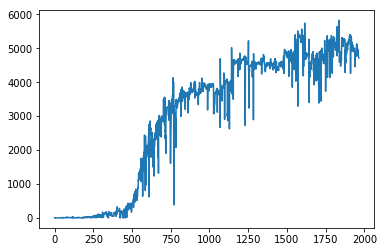

In [160]:
plt.plot(well_3_clean)

In [178]:
x = [-6, 1,2,3,4,5, 10]

{'whiskers': [<matplotlib.lines.Line2D at 0x2ad1ba87978>,
 'caps': [<matplotlib.lines.Line2D at 0x2ad1ba92278>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ad1ba87828>],
 'medians': [<matplotlib.lines.Line2D at 0x2ad1ba92ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ad1ba92ef0>],
 'means': []}

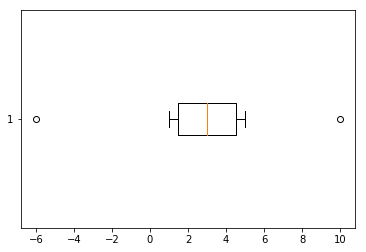

In [179]:
plt.boxplot(x, vert = False)